<a href="https://colab.research.google.com/github/orlandochr/elecciones_paraguay/blob/main/analisis_eleciones_paraguay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diplomado en Machine Learnng 2020
###Ucom Pro 
###Proyecto Final 
###Analsis de datos Elecciones Generales y Municipales Paraguay 
Orlando Chaparro.

Importación de Librerias

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt



Importación de datos
El dataset se importa desde el sitio web del proyecto. 


In [2]:
data_url = 'http://proyectoucom.orlychaparro.com/data/resultados-1996-2018-municipales-y-generales.csv'

elecciones_df = pd.read_csv(data_url, encoding = "ISO-8859-1",sep=';', engine='python')
#elecciones_df = pd.read_csv('/content/drive/My Drive/elecciones/data/resultados-1996-2018-municipales-y-generales.csv')

Shape (dimensión) del Dataset


In [3]:
elecciones_df.shape

(390760, 19)

In [4]:
elecciones_df.columns.values

array(['año', 'tipo_eleccion', 'dep', 'depdes', 'dis', 'disdes', 'zon',
       'zondes', 'loc', 'locdes', 'candidatura', 'cand_desc', 'lista',
       'siglas_lista', 'nombre_lista', 'votos', 'nulos', 'blancos',
       'total_votos'], dtype=object)

In [5]:
elecciones_df.dtypes

año                int64
tipo_eleccion     object
dep                int64
depdes            object
dis                int64
disdes            object
zon              float64
zondes            object
loc              float64
locdes            object
candidatura        int64
cand_desc         object
lista            float64
siglas_lista      object
nombre_lista      object
votos              int64
nulos              int64
blancos            int64
total_votos        int64
dtype: object

Ver datos del Dataframe

In [6]:
elecciones_df.head()


,año,tipo_eleccion,dep,depdes,dis,disdes,zon,zondes,loc,locdes,candidatura,cand_desc,lista,siglas_lista,nombre_lista,votos,nulos,blancos,total_votos
0,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,ANR,ASOCIACIÓN NACIONAL REPUBLICANA,105078,3638,2997,236033
1,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,1997,3638,2997,236033
2,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,PDC,PARTIDO DEMÓCRATA CRISTIANO,911,3638,2997,236033
3,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,PLRA_PEN,PARTIDO LIBERAL RADICAL AUTENTICO - PARTIDO EN...,120518,3638,2997,236033
4,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,MCPA,MOVIMIENTO CIUDADANO POR ASUNCION,894,3638,2997,236033


Descripción del Dataset

In [7]:
elecciones_df.describe()

,año,dep,dis,zon,loc,candidatura,lista,votos,nulos,blancos,total_votos
count,390760.000000,390760.000000,390760.000000,382937.000000,382937.000000,390760.000000,389558.000000,390760.000000,390760.000000,390760.000000,390760.000000
mean,2011.688832,7.228603,11.742717,0.524755,161.679579,3.055441,57.275227,173.300717,64.454862,93.737788,2244.733775
std,5.622785,4.588604,12.169237,1.337198,230.361750,1.534589,165.909665,743.632278,85.683357,116.199521,2737.604044
min,1996.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,3.000000,0.000000,0.000000,2.000000,2.000000,6.000000,2.000000,20.000000,26.000000,925.000000
50%,2013.000000,8.000000,9.000000,0.000000,7.000000,3.000000,12.000000,12.000000,44.000000,57.000000,1741.000000
75%,2018.000000,11.000000,19.000000,0.000000,501.000000,4.000000,40.000000,95.000000,85.000000,118.000000,2879.000000
max,2018.000000,18.000000,57.000000,6.000000,515.000000,6.000000,999.000000,120518.000000,11829.000000,3025.000000,236184.000000


Funcion para crear varables dummy

Se va a crear variables dummy sobre el campo Tipo_eleccion que contine los valores General y Municipal para pasarlos a valor 0 y 1



In [8]:
def createDummies(df,var_name):
  dummy = pd.get_dummies(df[var_name], prefix=var_name)
  # df = df.drop(var_name, axis =1) borra el campo
  df = pd.concat([df,dummy], axis = 1)
  return df


In [9]:
generales_df = createDummies(elecciones_df, "tipo_eleccion")


In [10]:
#Filtrar  el dataset original elecciones_df y convertirlo en el dataframe de datos de eleccioiones Generales


In [11]:
data2 = elecciones_df[elecciones_df["tipo_eleccion"]=="generales"]

data2.shape


(347286, 19)

In [12]:
data2.head()

,año,tipo_eleccion,dep,depdes,dis,disdes,zon,zondes,loc,locdes,candidatura,cand_desc,lista,siglas_lista,nombre_lista,votos,nulos,blancos,total_votos
43474,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,17729,537,230,33945
43475,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,3.0,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,320,537,230,33945
43476,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,6.0,BLANCO,PARTIDO BLANCO,145,537,230,33945
43477,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,10.0,ALIANZA_D,ALIANZA DEMOCRATICA PLRA_PEN,14984,537,230,33945
43478,1998,generales,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,5770,164,63,11112


In [13]:
data2 = data2[data2["candidatura"]==1]

In [14]:
data2.head()

,año,tipo_eleccion,dep,depdes,dis,disdes,zon,zondes,loc,locdes,candidatura,cand_desc,lista,siglas_lista,nombre_lista,votos,nulos,blancos,total_votos
43474,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,17729,537,230,33945
43475,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,3.0,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,320,537,230,33945
43476,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,6.0,BLANCO,PARTIDO BLANCO,145,537,230,33945
43477,1998,generales,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,10.0,ALIANZA_D,ALIANZA DEMOCRATICA PLRA_PEN,14984,537,230,33945
43478,1998,generales,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,5770,164,63,11112


In [15]:
columnas_seleccionadas = ['año','dep', 'depdes', 'dis', 'disdes', 'zon',
       'zondes', 'loc', 'locdes', 'candidatura', 'cand_desc', 'lista',
       'siglas_lista', 'nombre_lista', 'votos', 'nulos', 'blancos',
       'total_votos']
generales_df = data2[columnas_seleccionadas]    
   


In [16]:
generales_df.shape

(39713, 18)

In [17]:
generales_df.head(50)

,año,dep,depdes,dis,disdes,zon,zondes,loc,locdes,candidatura,cand_desc,lista,siglas_lista,nombre_lista,votos,nulos,blancos,total_votos
43474,1998,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,17729,537,230,33945
43475,1998,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,3.0,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,320,537,230,33945
43476,1998,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,6.0,BLANCO,PARTIDO BLANCO,145,537,230,33945
43477,1998,0,CAPITAL,1,LA ENCARNACION,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,10.0,ALIANZA_D,ALIANZA DEMOCRATICA PLRA_PEN,14984,537,230,33945
43478,1998,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,5770,164,63,11112
43479,1998,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,3.0,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,124,164,63,11112
43480,1998,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,6.0,BLANCO,PARTIDO BLANCO,22,164,63,11112
43481,1998,0,CAPITAL,2,LA CATEDRAL,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,10.0,ALIANZA_D,ALIANZA DEMOCRATICA PLRA_PEN,4969,164,63,11112
43482,1998,0,CAPITAL,3,SAN ROQUE,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,1.0,ANR,PARTIDO COLORADO,38857,1320,519,76400
43483,1998,0,CAPITAL,3,SAN ROQUE,NaN,NaN,NaN,NaN,1,PRESIDENTE Y VICEPRESIDENTE DE LA RCA.,3.0,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,709,1320,519,76400


Análisis preliminar del Dataset
Resumen de los datos



In [18]:
generales_df.columns.values

array(['año', 'dep', 'depdes', 'dis', 'disdes', 'zon', 'zondes', 'loc',
       'locdes', 'candidatura', 'cand_desc', 'lista', 'siglas_lista',
       'nombre_lista', 'votos', 'nulos', 'blancos', 'total_votos'],
      dtype=object)

Tipos de datos de los campos


In [19]:
generales_df.dtypes

año               int64
dep               int64
depdes           object
dis               int64
disdes           object
zon             float64
zondes           object
loc             float64
locdes           object
candidatura       int64
cand_desc        object
lista           float64
siglas_lista     object
nombre_lista     object
votos             int64
nulos             int64
blancos           int64
total_votos       int64
dtype: object

In [20]:
# Cantidad de registros con Valores nulos de los campos zon zon	zondes	loc	locdes lista
pd.isnull(generales_df["zon"]).values.ravel().sum()  


1669

In [21]:
pd.isnull(generales_df["zondes"]).values.ravel().sum()  


1669

In [22]:
pd.isnull(generales_df["loc"]).values.ravel().sum()  
 

1669

In [23]:
pd.isnull(generales_df["locdes"]).values.ravel().sum()  


1669

In [24]:
pd.isnull(generales_df["lista"]).values.ravel().sum() 

0

In [25]:
#elecciones_df["nombre_camponumerico"].fillna(0)     # Para cambiar con valores cero a los campos que tienen NAN
#elecciones_df["nombre_texto"].fillna("Desconocido") # Para cambiar con valores Texto a los campos String que tienen NAN

In [26]:
% matplotlib inline 
# savefig("path/archivo.jpg") para guardar las imagenes de grafico 

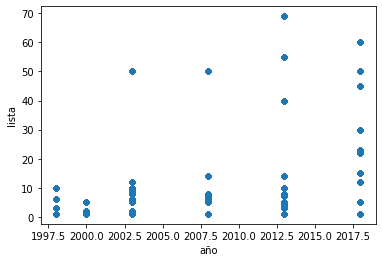

In [27]:
generales_df.plot(kind="scatter", x="año", y= "lista")

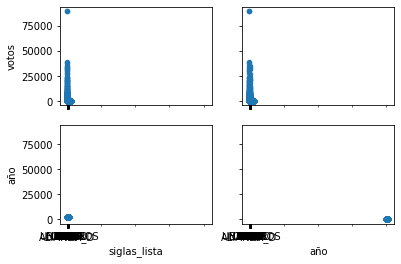

In [28]:
figure, axs = plt.subplots(2,2, sharey=True,sharex=True)
generales_df.plot(kind="scatter", x="lista", y = "votos", ax=axs[0][0])
generales_df.plot(kind="scatter", x="lista", y = "votos", ax=axs[0][1])
generales_df.plot(kind="scatter", x="siglas_lista", y = "año", ax=axs[1][0])
generales_df.plot(kind="scatter", x="año", y = "lista", ax=axs[1][1])

Historgrama de frecuencias

Text(0.5, 1.0, 'Historgrama de candidaturas')

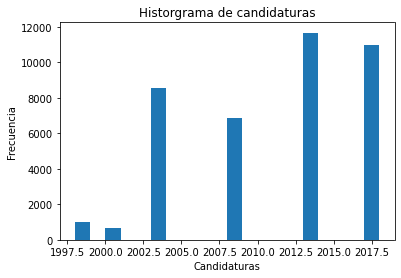

In [29]:
plt.hist(generales_df["año"],bins = 20)
plt.xlabel("Candidaturas")
plt.ylabel("Frecuencia")
plt.title("Historgrama de candidaturas")

Text(0.5, 1.0, 'Titlulo del boxplot')

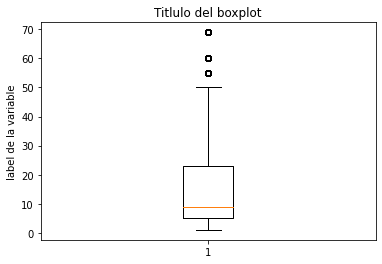

In [30]:
plt.boxplot(generales_df["lista"])
plt.ylabel("label de la variable")
plt.title("Titlulo del boxplot")